# Command line basics

```bash
$ pwd
```

This command returns the current directory (folder you're located in). It's an acronym that stands for "print working directory"

```bash
cd
```

Change directory


```bash
whoami
```

Right now, we're logged in as a user called dq (short for Dataquest). We can check which user we're logged in as with the whoami command.

```bash
cd ~
```

User home directory

```bash
mkdir test
```


create new directory/folder named "test"


```bash
mkdir test -v
```

options: -v activates the "verbose" option, giving feedback.


```bash
command --help
```

to show help / manual for that command, e.g. `mkdir --help`

```bash
ls -l
```

shows current files and folders in nicer table format 

```bash
rmdir
```

Remove directory
   

# Working with files

```bash
touch test.txt
```

It prints this text into a stream called standard output, or stdout. Every program writes to standard output, and receives input through standard input (stdin). Whenever a program experiences an error while running, it writes the error message to standard error (stderr). These standard streams are how programs show us output in the terminal, and how we enter input.

`stdout` and `stderr` usually **display on the monitor**, while `stdin` is the **input from the keyboard**. In this case, echo is taking a string from stdin, and printing that string to stdout. By default, we see the message that it prints to stdout, because it shows on the monitor.

## Writing to file with stdout

```bash
echo "Dataquest is awesome" > dataquest.txt
```


will write Dataquest is awesome to stdout, then redirect stdout to the file dataquest.txt. The end result is that the stream will write Dataquest is awesome to the file dataquest.txt.

## Opening files with nano

Nano is a command line text editor that lets us edit and save files directly from the terminal. To run nano, type nano, followed by the name of the file you want to edit. For example, nano test.txt will open the test.txt file for editing.


```bash
nano test.txt
```


## Permissions

In Unix, every file and folder has permissions associated with it. These permissions have three scopes:

* **owner** - The user who created the file or folder
* **group** - Users in the owner's group (on Unix systems, an owner can place users in groups)
* **everyone** - All other users on the system who aren't the user or in the user's group

Each scope can have any of three permissions (a scope can have multiple permissions at once):

* **read** - The ability to see what's in a file (if defined on a folder, the ability to see what files are in a folder)
* **write** - The ability to modify a file (if a folder, the ability to delete, modify, and rename files in the folder)
* **execute** - The ability to run a file (some files are executable, and need this permission to run)

### Symbolic notation

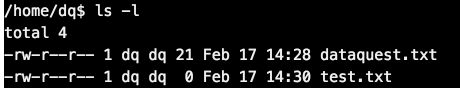

We can ignore the first character for now. Starting at the second character, the permissions are split into three groups -- one for user, one for group, and one for everyone.

We call this **symbolic notation** for permissions, because it expresses each permission as a symbol. The downside to symbolic notation is that if we want to change permissions, it takes a long time to type the changes out. We can do this more quickly by representing permissions with octal notation.

### Octal notation

Octal notation allows us to represent the permissions for all scopes with just 4 digits, rather than the 10 characters involved in symbolic notation. There are **8 possible combinations of the three permissions r, w, and x**. We can express each combination, or scope, as a single digit in an octal (base 8) counting system.

Here are the combinations and their corresponding digits:

* --- : No permissions; corresponds to 0
* --x : Execute only permission; corresponds to 1
* -w- : Write only permissions; corresponds to 2
* -wx : Write and execute permissions; corresponds to 3
* r-- : Read only permissions; corresponds to 4
* r-x : Read and execute permissions; corresponds to 5
* rw- : Read and write permissions; corresponds to 6
* rwx : Read, write, and execute permissions; corresponds to 7


We can use this system to convert the permissions string **-rw-r--r-- to 0644**. Just like with symbolic notation, don't worry about the first digit in octal notation right this second -- we'll get to it later.

#### Stat
We can pull up **a file's octal permissions with the `stat` command**. Typing stat test.txt will show us some information about the file test.txt, including the octal permissions.

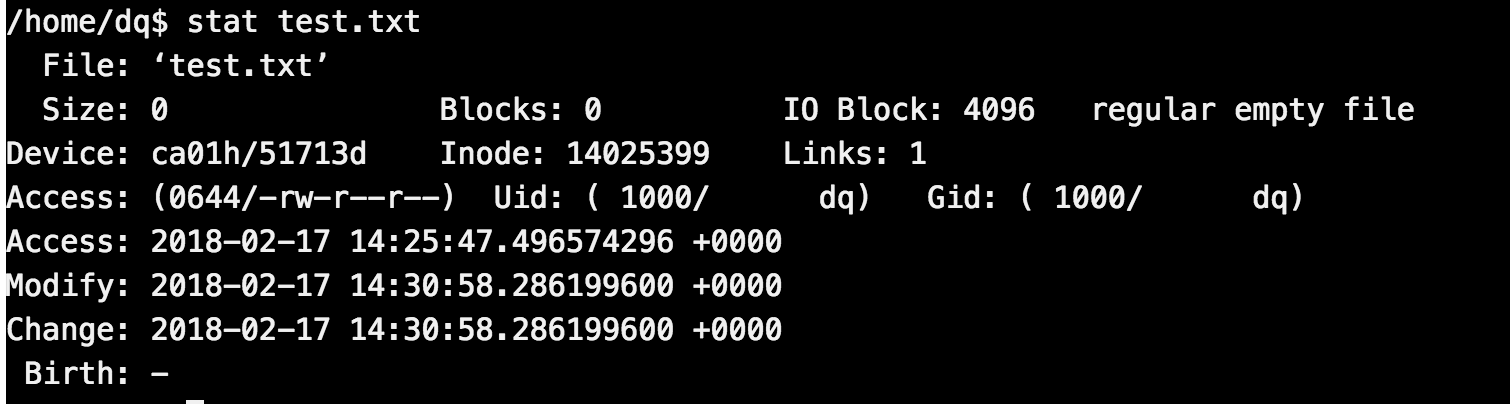


#### Chmod

Typing 
```bash
chmod 0664 test.txt
``` 
will give the **owner read and write permissions**, the group read and write permissions, and everyone else read-only permissions.



## File operations
### Moving Files

```bash
mv test.txt test
```

moves the file `test.txt` to the `test` directory


### Copy files

```bash
cp test.txt test2.txt
```


will copy the `test.txt` file, and create a new file called `test2.txt` containing the contents of test.txt.

### Renaming files / folders

```bash
mv test.txt test2.txt
```

#will move the file test.txt to test2.txt. This will basically rename test.txt.

### Deleting files

```bash
rm file
```

will remove the file provided it's in the same directory

## Sudo

Unix systems have a special user called the **root user**. We can **run commands as the root user using `sudo`**. Adding sudo to the beginning of any command will run that command as the root user.

For example, typing `sudo rm test.txt` will switch to the root user, then delete the test.txt file as the root user. This is useful in situations where the current user doesn't have permission to delete the file. The root user has all permissions and access to all files by default.

You'll typically need to **enter a password to switch to the root user**, which makes sense. For security reasons, we don't want anyone to be able to switch to the root user just by typing sudo whenever they want.



# Working with Programs

While there are many UNIX shells, Bash is one of the most popular. Bash is the default shell on most Linux and OS X computers.

Bash is essentially **a program that lets us run other programs**. It does this by implementing a command language. This language specifies how to type and structure the commands we want to execute.

A command language is a special kind of programming language through which we can control applications and the system as a whole. Just like Python and other programming languages, we can use Bash to create scripts, set variables, and more. Because it's a language, **Bash is far more powerful than a graphical shell**.

## Variables in Bash

We can set variables on the command line by assigning values to them. In the command line environment, variables consist entirely of uppercase characters, numbers, and underscores. We can assign any data type to a variable. Here are a few examples of how we can set variables on the command line:

```bash
OS=linux
OPERATING_SYSTEM="linux"
ANIMAL="Shark with laser beam on its head"
```



Bash is "space sensitive", e.g. it's important to avoid adding stray spaces around the equals sign. For example, this assignment will fail

```bash
ANIMAL = "Shark with laser beam"
```


### Reading variables
To access vaiables use the syntax `$ANIMAL`. Calling only ANIMAL will look for the command ANIMAL. It will return an error, because there's no executable command named ANIMAL in PATH.

```bash
echo $ANIMAL`
```

will print "Shark with laser beam" to stdout

### Environment variables

Another type of variable is an environment variable. We can access these through any program we run from the shell.

We can create environment variables using the **`export` command**. For example, 

```bash
export FOOD="Chicken and waffles"
```


will create an **environment variable called FOOD**.


#### Environment <> Python

We can run many programs from Bash, including Python. To run the Python interpreter from the Bash shell, we type `python` at the command prompt.
Once we're inside the command prompt, we can **access the environment variables with commands** that look like this:

```python
import os
print(os.environ["FOOD"])
```

**`os.environ`** acts as a **dictionary** containing all of the values for the environment variables. This should give you a feel for the power of environment variables -- we can use them to set configuration in Python scripts and other places. This functionality is useful when configuration is secret (like with access keys), or changing rapidly.

#### Path Environment variables

We can use `python`(instead of /usr/bin/python) because of the **PATH environment variable**, which is configured to point to several folders (creating a "shortcut"). We can run any program in any one of these folders just by typing the program's name. Because /usr/bin is one of the folders in PATH and python is in that folder, we can access the python interpreter just by typing `python`, instead of the full path.



## Program variables / arguments

We'll often want to **specify multiple flags**. Most flags have short, single-character names, as well as longer versions of those names. See the ls manual page for a closer look at this.

For example, `ls -a`, and `ls --all` do the same thing -- they'll both list all of the files in a directory, rather than hiding files that begin with a dot (`.`). The commands are equivalent.

When we have **multiple flags with short, single-character names**, we can **chain them together** to save time. `ls -la` will list all of the files in long format; it's equivalent to `ls -a -l`. The order of the l and the a don't matter. 

```bash
ls -la
ls -l -a
#Same result

```
### Longer flags

We can specify **longer flags with two dashes**. One such longer flag for ls is `--ignore`. Using `ls --ignore=test.txt` won't include any files named test.txt in the output of ls.

```bash
ls -al --ignore=test.txt
# will display all but test.txt
```


